In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data (Kaggle auto-links datasets in notebooks)
train = pd.read_csv('/kaggle/input/titanic/train.csv')  # Training data
test = pd.read_csv('/kaggle/input/titanic/test.csv')    # Test data for submission

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

<Figure size 1000x600 with 0 Axes>

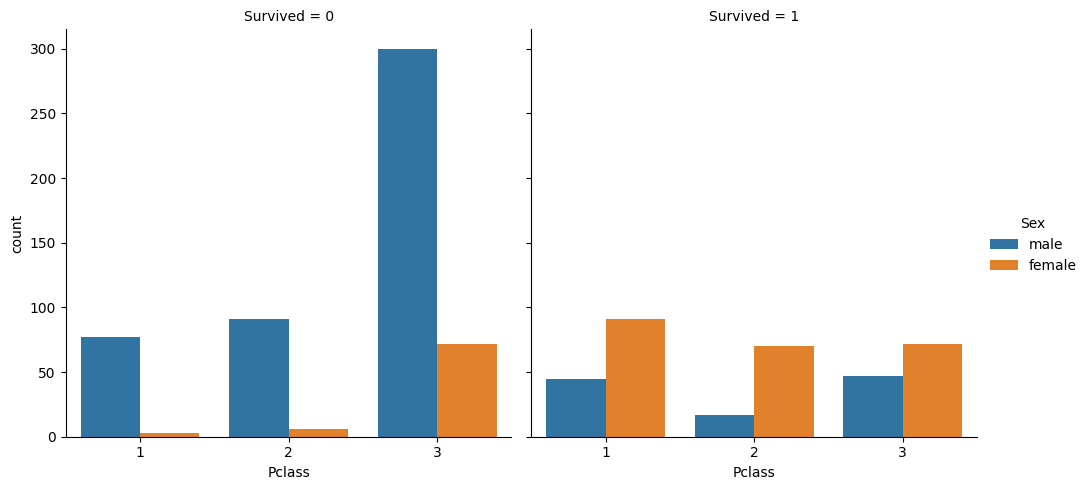

In [8]:
# EDA
print(train.info())
print(train.isnull().sum())
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=train, kind='count')
plt.show()

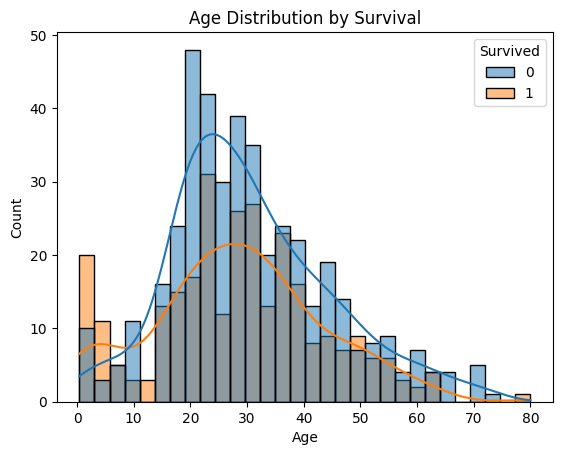

In [9]:
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

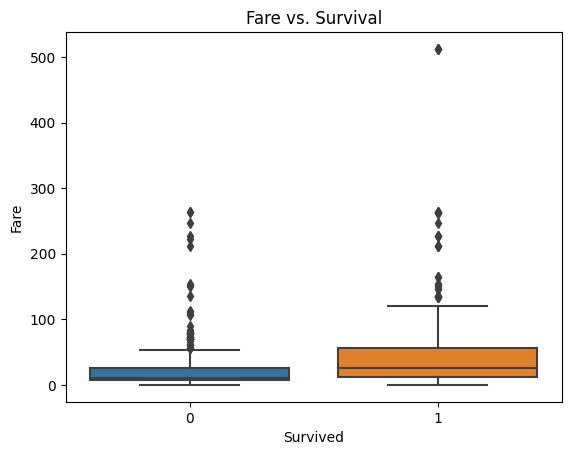

In [10]:
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare vs. Survival')
plt.show()

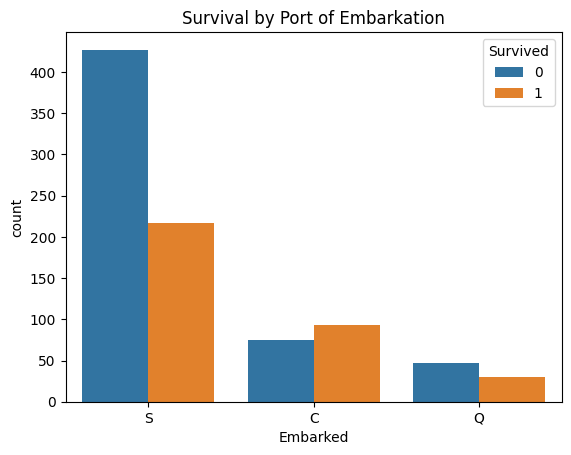

In [11]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Survival by Port of Embarkation')
plt.show()

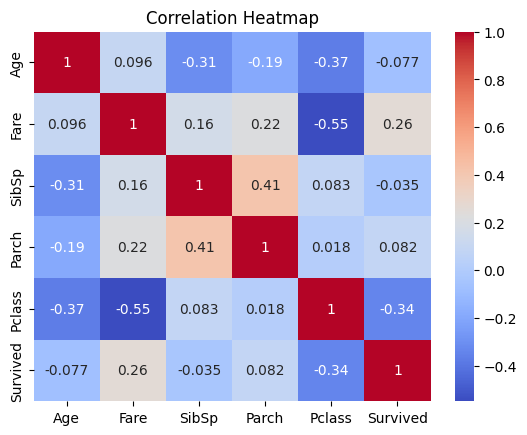

In [12]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass', 'Survived']
corr_matrix = train[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Feature engineering
all_data = pd.concat([train.drop('Survived', axis=1), test], axis=0, ignore_index=True)
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['IsAlone'] = (all_data['FamilySize'] == 1).astype(int)
all_data['Title'] = all_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
all_data['Title'] = all_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
all_data['Title'] = all_data['Title'].replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs')
all_data['CabinLetter'] = all_data['Cabin'].str[0].fillna('Unknown')
all_data['TicketPrefix'] = all_data['Ticket'].apply(lambda x: x.split()[0] if not x.isdigit() else 'None')
all_data['TicketPrefix'] = all_data['TicketPrefix'].apply(lambda x: 'Rare' if all_data['TicketPrefix'].value_counts()[x] < 10 else x)

In [14]:
# Features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 
            'FamilySize', 'IsAlone', 'Title', 'CabinLetter', 'TicketPrefix']
X = all_data.iloc[:len(train)][features]
X_test = all_data.iloc[len(train):][features]
y = train['Survived']

In [15]:
# Encode and impute
label_encoder = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title', 'CabinLetter', 'TicketPrefix']:
    X[col] = label_encoder.fit_transform(X[col].fillna('Unknown'))
    X_test[col] = label_encoder.transform(X_test[col].fillna('Unknown'))
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=features)
X_test = pd.DataFrame(imputer.transform(X_test), columns=features)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)
X_test = pd.DataFrame(scaler.transform(X_test), columns=features)

In [16]:
# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Models
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.best_estimator_.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Best RF Params: {rf_grid.best_params_}")

Random Forest Accuracy: 83.80%
Best RF Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [18]:
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.best_estimator_.predict(X_val)
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print(f"Best XGB Params: {xgb_grid.best_params_}")

XGBoost Accuracy: 80.45%
Best XGB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [19]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
y_pred_gb = gb_grid.best_estimator_.predict(X_val)
gb_accuracy = accuracy_score(y_val, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Best GB Params: {gb_grid.best_params_}")

Gradient Boosting Accuracy: 83.80%
Best GB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [20]:
ensemble = VotingClassifier(estimators=[
    ('rf', rf_grid.best_estimator_),
    ('xgb', xgb_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_)
], voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_val)
ensemble_accuracy = accuracy_score(y_val, y_pred_ensemble)
print(f"Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%")

Ensemble Accuracy: 82.12%


               Model  Accuracy (%)
0      Random Forest     83.798883
1            XGBoost     80.446927
2  Gradient Boosting     83.798883
3           Ensemble     82.122905


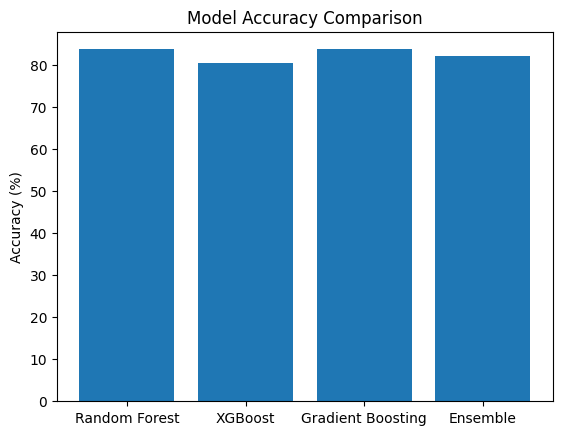

In [21]:
# Comparison
models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Ensemble']
accuracies = [rf_accuracy * 100, xgb_accuracy * 100, gb_accuracy * 100, ensemble_accuracy * 100]
comparison_df = pd.DataFrame({'Model': models, 'Accuracy (%)': accuracies})
print(comparison_df)
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()

In [22]:
# Submit
predictions = ensemble.predict(X_test)
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file created!")

Submission file created!
